In [1]:
%cd ..

/home/jovyan/HyperDomainNet


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from omegaconf import OmegaConf
from pathlib import Path
from collections import OrderedDict

from core.utils.common import mixing_noise
from core.utils.image_utils import construct_paper_image_grid
from core.utils.example_utils import Inferencer

In [3]:
target_im_styles = [
    'anastasia',
    'digital_painting_jing',
    'mermaid',
    'sketch',
    'speed_paint',
    'titan_armin',
    'titan_erwin'
]

im2im_ckpt_pathes = [
    'im2im_checkpoints/im2im_anastasia.pt',
    'im2im_checkpoints/im2im_digital_painting_jing.pt',
    'im2im_checkpoints/im2im_mermaid.pt',
    'im2im_checkpoints/im2im_sketch.pt',
    'im2im_checkpoints/im2im_speed_paint.pt',
    'im2im_checkpoints/im2im_titan_armin.pt',
    'im2im_checkpoints/im2im_titan_erwin.pt',
]

trg_to_im2im_ckpt = {k:v for k, v in zip(target_im_styles, im2im_ckpt_pathes)}


target_text_styles = [
    'anime',
    'monalisa',
    'pixar',
    'sketch',
    'ukiyo-e',
    'botero',
    'werewolf',
    'zombie',
    'joker',
    'neanderthal'
]

text_ckpt_pathes = [
    'td_checkpoints/td_anime.pt',
    'td_checkpoints/td_monalisa.pt',
    'td_checkpoints/td_pixar.pt',
    'td_checkpoints/td_sketch.pt',
    'td_checkpoints/td_ukiyo-e.pt',
    'td_checkpoints/td_botero.pt',
    'td_checkpoints/td_werewolf.pt',
    'td_checkpoints/td_joker.pt',
    'td_checkpoints/td_neanderthal.pt',
]

trg_to_text_ckpt = {k:v for k, v in zip(target_text_styles, text_ckpt_pathes)}

In [4]:
target_style = 'anastasia'
device = 'cuda:0'

ckpt_path = trg_to_im2im_ckpt[target_style]
ckpt = torch.load(ckpt_path, map_location='cpu')

In [5]:
model = Inferencer(ckpt, device)

In [6]:
z = mixing_noise(
    16, 512, 0, device
)

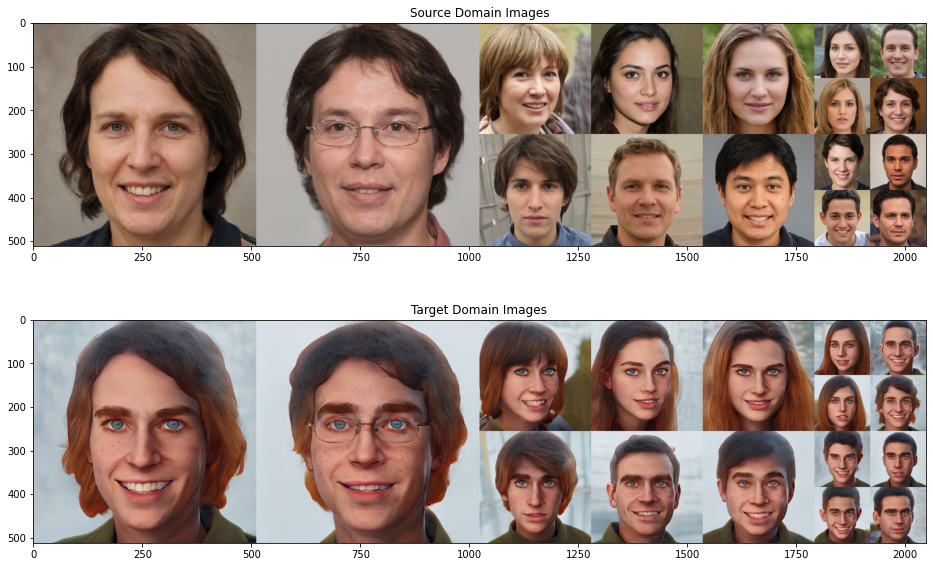

In [7]:
src_im, trg_im = model(z, truncation=0.5)

src_im = construct_paper_image_grid(src_im)
trg_im = construct_paper_image_grid(trg_im)

fig, ax = plt.subplots(2, 1, figsize=(16, 10))

ax[0].imshow(src_im)
ax[0].set_title('Source Domain Images')

ax[1].imshow(trg_im)
ax[1].set_title('Target Domain Images')

plt.show()

In [8]:
target_style = 'anime'
device = 'cuda:0'

ckpt_path = trg_to_text_ckpt[target_style]
ckpt = torch.load(ckpt_path, map_location='cpu')

In [9]:
model = Inferencer(ckpt, device)

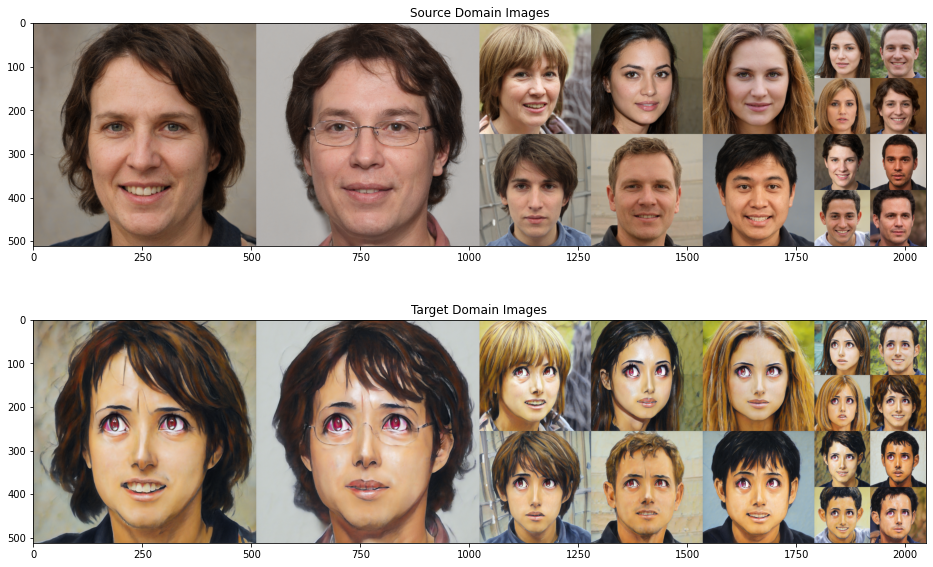

In [10]:
src_im, trg_im = model(z, truncation=0.5)

src_im = construct_paper_image_grid(src_im)
trg_im = construct_paper_image_grid(trg_im)

fig, ax = plt.subplots(2, 1, figsize=(16, 10))

ax[0].imshow(src_im)
ax[0].set_title('Source Domain Images')

ax[1].imshow(trg_im)
ax[1].set_title('Target Domain Images')

plt.show()